<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# <center>AUTOBOX Face Recognition System</center> 
### <center>CV Capstone Project (1003)</center>

## Table of Contents
 
1. [Problem Statement](#section1)</br>
    - 1.1 [Project Description](#section101)<br/>
    - 1.2 [Consulting Goal](#section102)<br/>
    - 1.3 [Data Description](#section103)<br/>
<br>

2. [Observations from Dataset (Week-1)](#section2)</br>
    - 2.1 [Importing Packages](#section201)<br/>
    - 2.2 [Observations](#section202)<br/>
    
<br>

3. [Extracting Faces from the Images using MTCNN (Week-2)](#section3)</br>
    - 3.1 [Function for extracting face from a single image](#section301)<br/>
    - 3.2 [Function for extracting faces from all the images under one celebrity folder](#section302)<br/>
    - 3.3 [Function for extracting faces from all the images under all the celebrities folders](#section303)<br/>
    - 3.4 [Extracting faces from Train and Val Images](#section304)<br/>
    - 3.5 [Saving the extracted faces](#section305)<br/>
  
<br>

4. [Extracting Emedding vectors from the extracted faces using FaceNet Model (Week-3)
](#section4)</br>
    - 4.1 [Loading the extracted faces](#section401)<br/>
    - 4.2 [oading FaceNet Model](#section402)<br/>
    - 4.3 [Function for extracting embedding vector for one face](#section403)<br/>
    - 4.4 [Function for Extracting Embedding vectors for all the faces](#section404)<br/>
    - 4.5 [Extracting Embedding vectors for Train and Val data](#section405)<br/>
    - 4.6 [Saving Embedding Vectors](#section406)<br/>

<br>

5. [Preprocessing and predictions on extracted Embedding Vectors
](#section5)</br>
    - 5.1 [Loading the embedding vectors](#section501)<br/>
    - 5.2 [Preprocessing: Normalizing and Label Encoding](#section501)<br/>
    - 5.3 [Predictions with SVClassifier](#section503)<br/>
    - 5.4 [Metrics](#section504)<br/>

<br>

6. [Predictions on Test Data](#section6)</br>
    - 6.1 [Preparation and Input of test images to trained model](#section601)<br/>
    - 6.2 [Submission File](#section602)<br/>

<br>

7. [Conclusion](#section7)</br>
    
<br>


<a id=section1></a>
## 1. Problem Statement

<a id=section101></a>
### 1.1 Project Description

The client for this project is the Administration Department at AutoBox having over a thousand employees.

- They want to maintain a central database of all of their employees. 
- And, extra emphasis is on increasing security and ease of operation.
- The idea is to create a web-based app for Facial Recognition in order to have rightful entry to the office premises and restrict any trespassers.
- Once the employees are identified on a daily basis, they can have a simple entry and exit procedure without any manual intervention.
- They want to deal with their existing employee’s database and those coming in as a new recruit.

Current Practice:
- The existing employees or the ones joining the Company gets a card having a QR(RFID) code with unique identification for entry and exit.


The current practice suffers from the following problems:
- This approach is too haphazard. The quality of insight gained is misaligned due to misleading data.
- The second problem is these insights can't be aggregated to frame certain policies on this.
- The third problem is the security breach of the Company, which can hamper the situation very badly.

The Admin Department has hired you as an AI Engineer. They want to supplement their security protocols with a more proactive approach.

<a id=section102></a>
### 1.2 Project Goal

#### Our Role
- You will be provided with a dataset consisting of images of various celebrities.
- You should also add your images to the data. The procedure for adding your images is mentioned in Week - 1 mailer.
- Then you have to build a face recognition model using the Image data from the database provided above.
- The model should be able to detect faces from images and recognize the person present in the image.
- The recognized person will then be authorized to enter or exit the company premises.

#### Problem Specificied
- Deliverable: Predict whether the person will be allowed entry or exit into the company premises.
- Deep Learning task: Build a Face Recognition model using FaceNet
- Target: Predict the name of the person in the image.
- Win condition: The model should be able to recognize the person present in the images, and if the model hasn’t seen a person before, it should output a message suggesting that this person is not found in the database and entry is restricted, and label it as Unidentified in the submission file.

<a id=section103></a>
### 1.2 Project Description


The Business Intelligence Analysts of the Company provided you with a dataset that contains images of different celebrities.

The dataset is divided into three parts: train, val, and test set.
Each image in the dataset is a .jpg colored image.

#### train and val:
- The train and val sets contain images of 15 different celebrities.
The images are present in 15 different sub-directories in both folders.
- These sub-directories are named after the celebrity they contain the images of where the first name and the last name of the celeb is separated by an underscore ‘_’ for example Arnold_Schwarzenegger.
- There are more than 10 images of each celebrity in the train set.
- There are 5 images of each celebrity in the val set.
- Each image in the sub-directory of both the train and val set is named in such a way that they first contain the name of the sub-directory and then a number separated by an underscore ‘_’ for example Arnold_Schwarzenegger_0001.jpg

#### test:
- The test set contains 22 different images.
- These images are named from 1 to 22.
- A sample submission csv file named sample_submission.csv is also provided with the test set.
- This sample submission file contains the format of the final predictions submission csv file that you need to upload via the Upload Submission tab.


In [1]:
pip install mtcnn

Note: you may need to restart the kernel to use updated packages.


<a id=section2></a>
## 2. Observations from data (Week-1)

<a id=section201></a>
### 2.1 Installing Dependencies

In [4]:
import pandas as pd
import numpy as np

# Importing CV Libraries
import cv2
from mtcnn.mtcnn import MTCNN
from keras.models import load_model
from PIL import Image

# Importing preprocessing libraries
from sklearn.preprocessing import LabelEncoder, Normalizer


# Importing Models for prediction
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score

#Plotting
from matplotlib import pyplot as plt

# Importing OS
import os
print(os.listdir(os.getcwd()))
wkdir = os.getcwd()


['Celebrity-embeddings.npz', '.DS_Store', 'test', 'facenet_keras.h5', 'Final_Submission_1.csv', 'Capstone_Project_CV_(1003)_Final.ipynb', '.ipynb_checkpoints', 'Celebrity-faces.npz', 'data', '.idea']


### 2.2 Observations

- Input data dimension is (250, 250, 3).
- Each celebrity's pictures are collected in a individual sub-folder with their corresponding name on it.
- We can use the folder structure to create X and y by separating the name of sub-folder as Y and pictures in sub-folder as X.
- The pictures in dataset has faces of other people and backgound in them. 
- We have to separate the faces from pictures so that the model can learn the faces without any noise.
- As our problem statement is to restrict or allow persons, it is a classification problem.
- We can use simple machine learning classifier for classification.

<a id=section3></a>
## 3. Extracting Faces from the Images using MTCNN (Week-2)


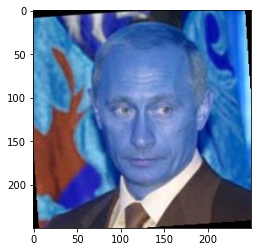

(250, 250, 3)


In [15]:
# View sample image

imgg = cv2.imread('data/train/Vladimir_Putin/Vladimir_Putin_0002.jpg')
plt.imshow(imgg)
plt.show()
print(imgg.shape) 

<a id=section301></a>
### 3.1 Function for extracting face from a single image

In [17]:
# Function for extracting face from a single image

def extract_image_face(imgname):
    img = Image.open(imgname)                # Loading Image
    pxls = np.asarray(img)                   # Convert Image to array
    detector = MTCNN()                       # MTCNN Detector with default weights
    result = detector.detect_faces(pxls)     # Detecting faces from the image
    x1, y1, width, height = result[0]['box'] # Extracting the boundaries from the image
    x1, y1 = abs(x1), abs(y1)                # Handling any negative pixel values
    x2, y2 = x1+width, y1+height             # pixel boundaries of face extraction from image
    face = pxls[x1:x2,y1:y2]                 # Extracting the face of image
    img = Image.fromarray(face)              # Reverting from array to image for resizing as required by FaceNet Model
    req_size=(160,160)
    img = img.resize(req_size)               # Resizing to (160,160) for FaceNet Model
    Exface_array = np.asarray(img)           # Converting image to array
    return Exface_array


2022-01-15 18:12:08.261253: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-15 18:12:08.798954: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


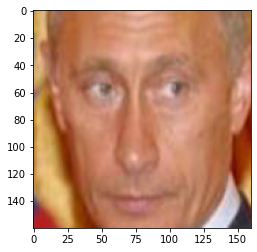

(160, 160, 3)


In [18]:
# Extracted face from the abobe shown sample image

imgf = extract_image_face('data/train/Vladimir_Putin/Vladimir_Putin_0002.jpg')
plt.imshow(imgf)
plt.show()
print(imgf.shape)   # Shape

<a id=section302></a>
### 3.2 Function for extracting faces from all the images under one celebrity folder

In [9]:
# Function for extracting faces from all the images under one celebrity folder

def extract_celebrity_faces(path1):
    faces = []                            # Creating an empty list for saving extracted faces
    for imgname in os.listdir(path1):     # For loop to iterate over all the images inder celebrity folder
        path0 = path1 + imgname          
        face = extract_image_face(path0)  # Calling the function for extracting face from each image
        faces.append(face)                # Appending the extracted face to the faces list created above
    return faces


<a id=section303></a>
### 3.3 Function for extracting faces from all the images under all the celebrities folders

In [10]:
# Function for extracting faces from all the images under all the celebrities folders.
# This function will load the data, extract the data and returns X and Y.

def extract_data_faces(path):
    X, Y = [],[]                                           # Creating empty lists for saving faces seperately under X and Y
    for celbname in os.listdir(path):                      # For loop to iterate over all the folders('celebrity') under 'data' folder
        path1 = path +"/" + celbname + "/"          
        faces = extract_celebrity_faces(path1)             # Calling the function for extracting all the faces under celebrity folder
        ylabels = [celbname for i in range(len(faces))]    # Creating labels for Y with that current celebrity name(celbname) in the for loop
        print("{0} Faces of celebrity: {1} are extracted!".format(len(faces),celbname))
        X.extend(faces)                                    # X is extended with the faces of each celebrity but not append because, all the faces in each for loop is of one celebrity
        Y.extend(ylabels)                                  # Y is extended with the labels generated but not append because, all the lablels in each for loop is of one celebrity
    return np.asarray(X), np.asarray(Y)                    # Converting X and Y to array for further computation


<a id=section304></a>
### 3.4 Extracting faces from Train and Val Images

In [11]:
# Extracting X_train and Y_train from Train Data

train_path = wkdir +"/"+'data'+"/"+'train'+"/"
X_train, Y_train = extract_data_faces(train_path)


'\ntrain_path = wkdir +"/"+\'data\'+"/"+\'train\'+"/"\nX_train, Y_train = extract_data_faces(train_path)\n'

In [12]:
# Extracting X_val and Y_val from Val Data

val_path = wkdir +"/"+'data'+"/"+'val'+"/"
X_val, Y_val = extract_data_faces(val_path)


'\nval_path = wkdir +"/"+\'data\'+"/"+\'val\'+"/"\nX_val, Y_val = extract_data_faces(val_path)\n'

In [13]:

print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)


'\nprint(X_train.shape)\nprint(Y_train.shape)\nprint(X_val.shape)\nprint(Y_val.shape)\n'

<a id=section305></a>
### 3.5 Saving the extracted faces

In [14]:
# Saving Faces

np.savez_compressed('Celebrity-faces.npz', X_train, Y_train, X_val, Y_val)

<a id=section4></a>
## 4. Extracting Emedding vectors from the extracted faces using FaceNet Model (Week-3)

<a id=section401></a>
### 4.1 Loading the extracted faces

In [15]:
#Loading the faces that are extracted and saved

FData = np.load('Celebrity-faces.npz')
X_train, Y_train, X_val, Y_val = FData['arr_0'],FData['arr_1'],FData['arr_2'],FData['arr_3']
print('Extracted Faces data has been loaded!')

Extracted Faces data has been loaded!


<a id=section402></a>
### 4.2 Loading FaceNet Model

In [16]:
# Loading FaceNet Model

facenet_model = load_model('facenet_keras.h5')
print('FaceNet model has been loaded!')

FaceNet model has been loaded!


<a id=section403></a>
### 4.3 Function for extracting embedding vector for one face

In [17]:
# Function for Extracting Embedding Vector for one face using FaceNet Model

def extract_face_embedding(face, model):
    face = face.astype('float32')               # Converting to float for computation
    face = (face-face.mean())/face.std()        # Standardizing the face with mean and std
    model_input = np.expand_dims(face, axis=0)  # Expanding dimensions before sending the face for embedding prediction with axis=0
    model_output = model.predict(model_input)   # Prediction for input face
    return model_output[0]                      # Returning the first predicted Embedding vector


<a id=section404></a>
### 4.4 Function for Extracting Embedding vectors for all the faces

In [18]:
# Function for Extracting Embedding vectors for all the faces

def extract_faceS_embeddingS(X_data, model=facenet_model):
    emb_X = []                                       # Empty list for holding embedding vectors
    for face in X_data:                              # For loop for iterating through all the faces of input data
        face_emb = extract_face_embedding(face,model)  # Calling the single face embedding extract function for each face
        emb_X.append(face_emb)                         # Appending the embedding to the list created above
    return np.asarray(emb_X)                         # Converting to array to make ready for ML predictions


<a id=section405></a>
### 4.5 Extracting Embedding vectors for Train and Val data

In [19]:
# Extracting Embedding vectors for X_Train and X_val

X_train_emb = extract_faceS_embeddingS(X_train)
X_val_emb = extract_faceS_embeddingS(X_val)


'\nX_train_emb = extract_faceS_embeddingS(X_train)\nX_val_emb = extract_faceS_embeddingS(X_val)\n'

<a id=section406></a>
### 4.6 Saving Embedding Vectors

In [20]:
# Saving Embeddings to one zip file

np.savez_compressed('Celebrity-embeddings.npz',X_train_emb, Y_train, X_val_emb, Y_val)

<a id=section5></a>
## 5. Preprocessing and predictions on extracted Embedding Vectors

<a id=section501></a>
### 5.1 Loading the embedding vectors

In [21]:
#Loading the embedding vectors that are extracted and saved

EmbData = np.load('Celebrity-embeddings.npz')
X_train_emb, Y_train, X_val_emb, Y_val = EmbData['arr_0'],EmbData['arr_1'],EmbData['arr_2'],EmbData['arr_3']
print('Extracted Embedding Vectors have been loaded!')

Extracted Embedding Vectors have been loaded!


<a id=section502></a>
### 5.2 Preprocessing: Normalizing and Label Encoding

In [22]:
# Normalizing input X vectors 
Norm = Normalizer()                           # Initializing Normalizer for X
X_train_final = Norm.transform(X_train_emb)   # Transforming X_train embeddings
X_val_final = Norm.transform(X_val_emb)       # Transforming X_val embeddings



#Label_Encoding Y labels
labenc = LabelEncoder()                       # Initializing Label Encoder for Y
labenc.fit(Y_train)                           # Fitting the Y_train values
Y_train_final = labenc.transform(Y_train)     # Label Encoding Y_train
Y_val_final = labenc.transform(Y_val)         # Label Encoding Y_val

<a id=section503></a>
### 5.3 Predictions with SVClassifier

In [23]:
# Predictions ML Models

ML_model = SVC(kernel='linear', probability=True)      # Initializing SVClassifier with Linear Kernel
ML_model.fit(X_train_final,Y_train_final)              # Fitting the model with Train data
Y_train_pred = ML_model.predict(X_train_final)         # Predictions on X_train
Y_val_pred = ML_model.predict(X_val_final)             # Predictions on X_val


<a id=section504></a>
### 5.4 Metrics

In [24]:
train_acc = accuracy_score(Y_train_pred,Y_train_final) # Accuracy of train predictions
val_acc = accuracy_score(Y_val_pred,Y_val_final)       # Accuracy of val predictions

print('Train Accuracy : ', train_acc)
print('Val Accuracy : ', val_acc )

Train Accuracy :  0.996996996996997
Val Accuracy :  1.0


<a id=section6></a>
## 6. Predictions on Test Data

<a id=section601></a>
### 6.1 Preparation and Input of test images to trained model

In [27]:

preds=[]                                                     # List of holding the predictions 
preds4sub =[]
for i in range(1,23):                                        # For loop to iterate over all the images in ascending order
    testimgpath = wkdir + "/" + 'test' + "/" + 'test' + "/" + str(i) +'.jpg'
    testface = extract_image_face(testimgpath)               # Extracting the face of each image with above written function
    testemb = extract_face_embedding(testface,facenet_model) # Extracting the Embedding vector from image face with above written function
    testemb = np.asarray(testemb).reshape(1,-1)              # Converting embedding to array. 
    #Reshaping the vector such that single image embedding input is compatible to Normalizer, which was used in train data
    
    testnorm = Norm.transform(testemb)                       # Normalizing the vector
    testpred = ML_model.predict(testnorm)                    # Prediction on the vector with ML Model
    testpredprob = ML_model.predict_proba(testnorm)          # Logging prediction probability 
    indx = testpred[0]                                       # Creating index from 1st(top) prediction of an image 
    clproba = testpredprob[0,indx]*100                       # Confidence of the particular image converted to percentage
    
    
    testpredlab = labenc.inverse_transform(testpred)         # Inverse Transforming the prediction from the label encoder 
    
    
    if (clproba<=40.0):                                      # Confidence threshold level
        testpredlab = 'Unidentified'                         # If <40 then, mark the person as unidentified else do nothing
    
    #print(testpredlab)
    
    #Converting the label from list to string
    testpredlab_string = ''                                     # An empty string for holding the prediction label
    for ele in testpredlab:                                     # Iterating over each letter
        testpredlab_string += ele                               # Assigning the letter to string holder created

    #print(predlab_string)

  
    b = [i,testpredlab_string,clproba]                       # Creating a list with input image, output prediction and confidence
    preds.append(b)                                          # Appending the above list to main predictions list
    
    s = [i,testpredlab_string]
    preds4sub.append(s)

df = pd.DataFrame(preds,columns=['image_name','prediction','confidence'])   # Dataframe for analysis

Submission = pd.DataFrame(preds4sub,columns=['image_name','prediction'])    # Dataframe for Submission


In [28]:
df

,image_name,prediction,confidence
0,1,Angelina_Jolie,72.450918
1,2,Arnold_Schwarzenegger,79.647765
2,3,Atal_Bihari_Vajpayee,65.872975
3,4,Bill_Clinton,70.356050
4,5,Bill_Gates,56.024560
5,6,Unidentified,29.534257
6,7,David_Beckham,60.482648
7,8,George_W_Bush,81.868199
8,9,Unidentified,19.046223
9,10,Unidentified,21.334583


<a id=section602></a>
### 6.2 Submission File

In [29]:
Submission.to_csv('Final_Submission.csv', index=False, header=False)

In [30]:
Submission

,image_name,prediction
0,1,Angelina_Jolie
1,2,Arnold_Schwarzenegger
2,3,Atal_Bihari_Vajpayee
3,4,Bill_Clinton
4,5,Bill_Gates
5,6,Unidentified
6,7,David_Beckham
7,8,George_W_Bush
8,9,Unidentified
9,10,Unidentified


<a id=section7></a>
## 7. Conclusion

   By submitting the above predictions, we acheived 95% accuracy on test data with confidence threshold level of 40%. And on the other hand, Val predictions are 100%. From the metrics obtained, It can be concluded that combination o MTCNN, FaceNet Model and Linear SVClassifier is better fit for this data.


Although, Many aspects such as standardizing, resizing, normalizing... in handling the data are covered in this project. There is still room for experiments. Hence, Below are some key points to be considered for future improvements.
- Data Validation: Remove wrong or duplicate pictures from the folders
- Data Augmentation: Apply rotations, flips and shifts to the image before extracting faces.
- Models: Experiment with different classifiers to check for better confidences.
- Training: Train model with more data periodically for stability.
- Validate predictions with different confidence threshold levels.